In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## HMS - Harmful Brain Activity Classification 

## train data

    eeg_id - A unique identifier for the entire EEG recording.
    eeg_sub_id - An ID for the specific 50 second long subsample this row's labels apply to.
    eeg_label_offset_seconds - The time between the beginning of the consolidated EEG and this subsample.
    spectrogram_id - A unique identifier for the entire EEG recording.
    spectrogram_sub_id - An ID for the specific 10 minute subsample this row's labels apply to.
    spectogram_label_offset_seconds - The time between the beginning of the consolidated spectrogram and this subsample.
    label_id - An ID for this set of labels.
    patient_id - An ID for the patient who donated the data.
    expert_consensus - The consensus annotator label. Provided for convenience only.
    [seizure/lpd/gpd/lrda/grda/other]_vote - The count of annotator votes for a given brain activity class. The full names of the activity classes are as follows: lpd: lateralized periodic discharges, gpd: generalized periodic discharges, lrd: lateralized rhythmic delta activity, and grda: generalized rhythmic delta activity . A detailed explanations of these patterns is available here.


## test data


    eeg_id
    spectrogram_id
    patient_id



In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'],
      dtype='object')

In [4]:
df.shape

(106800, 15)

In [5]:
10680/17360 
# there are 17360 at the website
# here only 106800, maybe the rest are test and or validation

0.6152073732718893

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [7]:
df.sample(10)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
39823,1315636310,37,246.0,764146759,919,15890.0,3347381937,30631,LPD,0,7,0,6,0,2
58222,156406230,10,32.0,1169302524,10,32.0,2638393985,23309,GRDA,0,0,0,0,3,0
8579,166302966,6,70.0,160509439,6,70.0,2149479824,62454,Seizure,3,0,0,0,0,0
24133,3781688787,0,0.0,473615791,0,0.0,1144182490,54641,GRDA,0,0,0,0,3,0
15423,3524019833,6,66.0,304136804,6,66.0,1491215654,45795,Seizure,3,0,0,0,0,0
81016,1217293541,10,66.0,1643788791,88,3738.0,3144685591,38549,GPD,1,4,8,0,0,0
89627,672742669,4,92.0,1834631860,4,92.0,4249144810,105,Other,0,0,0,0,3,12
26760,4021965560,1,2.0,525426737,10,918.0,757088408,23337,LRDA,0,1,0,3,0,1
51872,56317817,7,34.0,1021155207,13,140.0,2044571882,31019,GRDA,0,0,0,1,2,0
42934,2461380912,12,128.0,833149773,12,128.0,2163469099,7198,Seizure,3,0,0,0,0,0


In [8]:
df.isnull().mean()[df.isnull().mean() > 0] * 100 # show percentage of all above 0 missing values

Series([], dtype: float64)

In [9]:
df['expert_consensus'].value_counts()

expert_consensus
Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: count, dtype: int64

In [10]:
df['expert_consensus'].count()

106800

C:\Users\Or\AppData\Local\Temp\ipykernel_17024\3547015928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dat.index, y=dat.values, palette='viridis')


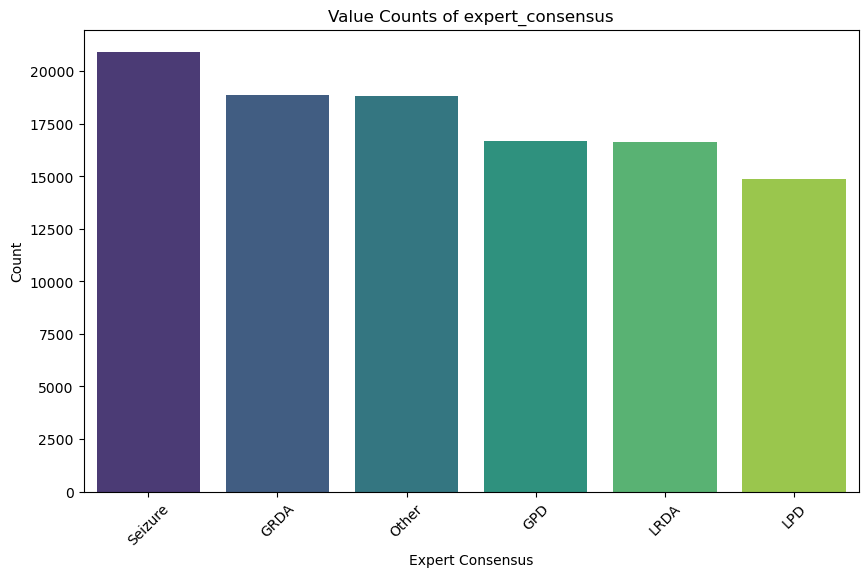

In [11]:
dat = df['expert_consensus'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=dat.index, y=dat.values, palette='viridis')
plt.title('Value Counts of expert_consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
for col in df.columns:
  if df[col].dtype in ['float64', 'int64','object']:
    if df[col].nunique() < 20:
        print(f'Feature": {col}, unique values: {df[col].nunique()},unique values: {list(df[col].unique())}')
    else:
        print(f'Feature: {col}, unique values: {df[col].nunique()}')

Feature: eeg_id, unique values: 17089
Feature: eeg_sub_id, unique values: 743
Feature: eeg_label_offset_seconds, unique values: 1502
Feature: spectrogram_id, unique values: 11138
Feature: spectrogram_sub_id, unique values: 1022
Feature: spectrogram_label_offset_seconds, unique values: 4686
Feature: label_id, unique values: 106800
Feature: patient_id, unique values: 1950
Feature": expert_consensus, unique values: 6,unique values: ['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD']
Feature": seizure_vote, unique values: 18,unique values: [3, 0, 1, 4, 5, 6, 13, 2, 12, 14, 7, 10, 15, 9, 8, 11, 16, 19]
Feature": lpd_vote, unique values: 19,unique values: [0, 1, 2, 4, 7, 3, 9, 13, 11, 5, 6, 8, 12, 15, 10, 18, 14, 16, 17]
Feature": gpd_vote, unique values: 17,unique values: [0, 5, 2, 1, 3, 7, 12, 13, 11, 6, 4, 8, 9, 14, 10, 15, 16]
Feature": lrda_vote, unique values: 16,unique values: [0, 14, 3, 2, 1, 9, 5, 8, 11, 4, 6, 7, 12, 10, 13, 15]
Feature": grda_vote, unique values: 16,unique values: [

In [13]:
eeg = pd.read_parquet('1000913311.parquet', engine='pyarrow')

In [14]:
eeg.shape

(10000, 20)

In [15]:
eeg.sample(10)

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
9214,-86.019997,-67.279999,-68.190002,-70.730003,-71.449997,-60.209999,-79.360001,-64.440002,-51.000000,-72.510002,-76.720001,-65.989998,-70.449997,-89.620003,-100.510002,-33.150002,-62.310001,117.160004,238.919998,4213.470215
7443,-62.470001,-52.849998,-77.449997,-90.139999,-74.480003,-75.739998,-46.090000,-97.620003,2.800000,-38.410000,-93.809998,-48.250000,-37.250000,-86.389999,-127.000000,-30.090000,-53.660000,-133.449997,-105.570000,-361.510010
4172,19.410000,60.770000,54.959999,63.669998,68.180000,55.730000,60.009998,45.910000,34.290001,59.220001,43.799999,22.990000,53.950001,32.950001,22.650000,76.820000,84.820000,-185.149994,-264.899994,-4517.850098
7614,-30.010000,-24.770000,-40.220001,-54.610001,-49.369999,-64.040001,-80.809998,-83.400002,2.730000,-12.140000,-59.619999,-0.890000,-2.580000,-37.049999,-67.440002,11.240000,-16.690001,149.389999,260.100006,4148.549805
2288,0.180000,20.410000,15.530000,-7.220000,21.889999,-11.780000,40.669998,-39.500000,6.770000,15.930000,-15.750000,16.670000,48.540001,35.130001,-16.270000,73.199997,86.290001,9.660000,-72.440002,-904.190002
3210,-107.589996,-102.419998,-102.269997,-97.769997,-72.080002,-74.709999,-77.599998,-68.029999,-61.099998,-89.989998,-85.080002,-79.349998,-65.180000,-78.790001,-76.190002,-51.110001,-66.419998,104.809998,198.509995,3605.300049
4372,8.940000,29.120001,13.450000,19.780001,29.660000,8.340000,53.230000,10.090000,36.759998,17.090000,8.720000,39.259998,62.919998,10.240000,-12.620000,75.800003,73.550003,-204.960007,-294.239990,-4565.729980
5547,-82.500000,-65.489998,-80.879997,-70.820000,-90.300003,-87.360001,-78.440002,-60.450001,-22.040001,-55.060001,-78.900002,-39.759998,-53.779999,-81.260002,-90.989998,-42.860001,-56.990002,170.539993,276.880005,4443.629883
2017,-88.550003,-77.879997,-100.120003,-88.230003,-100.250000,-109.129997,-100.739998,-100.419998,-35.790001,-71.860001,-87.089996,-49.189999,-60.770000,-93.720001,-93.120003,-32.330002,-70.849998,85.320000,212.300003,4288.700195
9551,-93.820000,-75.870003,-91.739998,-93.169998,-83.870003,-83.930000,-76.180000,-71.290001,-60.799999,-74.879997,-92.660004,-69.709999,-59.340000,-95.790001,-105.120003,-55.430000,-72.269997,140.289993,231.250000,4023.929932


In [16]:
eeg.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG'],
      dtype='object')

In [17]:
eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fp1     10000 non-null  float32
 1   F3      10000 non-null  float32
 2   C3      10000 non-null  float32
 3   P3      10000 non-null  float32
 4   F7      10000 non-null  float32
 5   T3      10000 non-null  float32
 6   T5      10000 non-null  float32
 7   O1      10000 non-null  float32
 8   Fz      10000 non-null  float32
 9   Cz      10000 non-null  float32
 10  Pz      10000 non-null  float32
 11  Fp2     10000 non-null  float32
 12  F4      10000 non-null  float32
 13  C4      10000 non-null  float32
 14  P4      10000 non-null  float32
 15  F8      10000 non-null  float32
 16  T4      10000 non-null  float32
 17  T6      10000 non-null  float32
 18  O2      10000 non-null  float32
 19  EKG     10000 non-null  float32
dtypes: float32(20)
memory usage: 781.4 KB


In [18]:
eeg.isnull().mean()[eeg.isnull().mean() > 0] * 100 # show percentage of all above 0 missing values

Series([], dtype: float64)

In [19]:
for col in eeg.columns:
  if eeg[col].dtype in ['float32']:
    if eeg[col].nunique() < 20:
        print(f'Feature {col}, unique values: {eeg[col].nunique()},unique values: {list(eeg[col].unique())}')
    else:
        print(f'Feature{col}, unique values: {eeg[col].nunique()}')

FeatureFp1, unique values: 7687
FeatureF3, unique values: 7878
FeatureC3, unique values: 7908
FeatureP3, unique values: 7743
FeatureF7, unique values: 8025
FeatureT3, unique values: 7712
FeatureT5, unique values: 7667
FeatureO1, unique values: 7411
FeatureFz, unique values: 7535
FeatureCz, unique values: 7595
FeaturePz, unique values: 7713
FeatureFp2, unique values: 7703
FeatureF4, unique values: 7890
FeatureC4, unique values: 7892
FeatureP4, unique values: 7840
FeatureF8, unique values: 7845
FeatureT4, unique values: 7883
FeatureT6, unique values: 8779
FeatureO2, unique values: 9085
FeatureEKG, unique values: 9927


In [20]:
spe = pd.read_parquet('1000086677.parquet', engine='pyarrow') # spectogram

In [21]:
spe.shape 

(300, 401)

In [22]:
spe.columns

Index(['time', 'LL_0.59', 'LL_0.78', 'LL_0.98', 'LL_1.17', 'LL_1.37',
       'LL_1.56', 'LL_1.76', 'LL_1.95', 'LL_2.15',
       ...
       'RP_18.16', 'RP_18.36', 'RP_18.55', 'RP_18.75', 'RP_18.95', 'RP_19.14',
       'RP_19.34', 'RP_19.53', 'RP_19.73', 'RP_19.92'],
      dtype='object', length=401)

In [23]:
spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 401 entries, time to RP_19.92
dtypes: float32(400), int64(1)
memory usage: 471.2 KB


In [24]:
spe.sample(10)

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
190,381,0.19,0.230000,0.240000,0.100000,0.070000,0.060000,0.050000,0.050000,0.040000,...,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00
6,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,393,0.31,0.250000,0.250000,0.080000,0.100000,0.100000,0.080000,0.110000,0.070000,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00
215,431,0.20,0.200000,0.300000,0.150000,0.110000,0.140000,0.070000,0.060000,0.070000,...,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01
35,71,52.73,38.750000,20.790001,9.030000,7.730000,8.800000,5.790000,5.430000,6.260000,...,2.24,1.97,2.81,2.44,2.55,2.32,1.81,1.57,0.87,0.69
81,163,9.34,18.940001,16.299999,18.809999,23.330000,30.760000,34.779999,30.870001,36.110001,...,0.09,0.10,0.06,0.06,0.07,0.06,0.06,0.04,0.05,0.05
143,287,1.16,1.530000,1.800000,1.770000,2.960000,3.300000,3.140000,2.950000,2.520000,...,0.42,0.54,0.57,0.53,0.56,0.43,0.49,0.67,0.39,0.75
181,363,12.85,13.760000,21.100000,33.189999,32.099998,31.549999,32.490002,28.700001,17.200001,...,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01
165,331,11.57,16.450001,17.990000,27.600000,26.320000,18.150000,21.510000,10.380000,11.430000,...,0.10,0.11,0.08,0.08,0.07,0.03,0.04,0.05,0.06,0.07
281,563,1.31,1.210000,1.330000,0.580000,0.160000,0.130000,0.090000,0.070000,0.060000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00


In [25]:
spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 401 entries, time to RP_19.92
dtypes: float32(400), int64(1)
memory usage: 471.2 KB


In [26]:
pd.set_option('display.max_rows', None) # change line showed, no limit


In [27]:
missing_values_df = spe[spe.isna().any(axis=1)] # show lines with missing values
display(missing_values_df)

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
4,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
spe.isnull().mean()[spe.isnull().mean() > 0] * 100 # show percentage of all above 0 missing values

LL_0.59     8.666667
LL_0.78     8.666667
LL_0.98     8.666667
LL_1.17     8.666667
LL_1.37     8.666667
LL_1.56     8.666667
LL_1.76     8.666667
LL_1.95     8.666667
LL_2.15     8.666667
LL_2.34     8.666667
LL_2.54     8.666667
LL_2.73     8.666667
LL_2.93     8.666667
LL_3.13     8.666667
LL_3.32     8.666667
LL_3.52     8.666667
LL_3.71     8.666667
LL_3.91     8.666667
LL_4.1      8.666667
LL_4.3      8.666667
LL_4.49     8.666667
LL_4.69     8.666667
LL_4.88     8.666667
LL_5.08     8.666667
LL_5.27     8.666667
LL_5.47     8.666667
LL_5.66     8.666667
LL_5.86     8.666667
LL_6.05     8.666667
LL_6.25     8.666667
LL_6.45     8.666667
LL_6.64     8.666667
LL_6.84     8.666667
LL_7.03     8.666667
LL_7.23     8.666667
LL_7.42     8.666667
LL_7.62     8.666667
LL_7.81     8.666667
LL_8.01     8.666667
LL_8.2      8.666667
LL_8.4      8.666667
LL_8.59     8.666667
LL_8.79     8.666667
LL_8.98     8.666667
LL_9.18     8.666667
LL_9.38     8.666667
LL_9.57     8.666667
LL_9.77     8

In [29]:
spe.isnull().sum()[spe.isnull().sum() > 0] # show amount of all above 0 missing value

LL_0.59     26
LL_0.78     26
LL_0.98     26
LL_1.17     26
LL_1.37     26
LL_1.56     26
LL_1.76     26
LL_1.95     26
LL_2.15     26
LL_2.34     26
LL_2.54     26
LL_2.73     26
LL_2.93     26
LL_3.13     26
LL_3.32     26
LL_3.52     26
LL_3.71     26
LL_3.91     26
LL_4.1      26
LL_4.3      26
LL_4.49     26
LL_4.69     26
LL_4.88     26
LL_5.08     26
LL_5.27     26
LL_5.47     26
LL_5.66     26
LL_5.86     26
LL_6.05     26
LL_6.25     26
LL_6.45     26
LL_6.64     26
LL_6.84     26
LL_7.03     26
LL_7.23     26
LL_7.42     26
LL_7.62     26
LL_7.81     26
LL_8.01     26
LL_8.2      26
LL_8.4      26
LL_8.59     26
LL_8.79     26
LL_8.98     26
LL_9.18     26
LL_9.38     26
LL_9.57     26
LL_9.77     26
LL_9.96     26
LL_10.16    26
LL_10.35    26
LL_10.55    26
LL_10.74    26
LL_10.94    26
LL_11.13    26
LL_11.33    26
LL_11.52    26
LL_11.72    26
LL_11.91    26
LL_12.11    26
LL_12.3     26
LL_12.5     26
LL_12.7     26
LL_12.89    26
LL_13.09    26
LL_13.28    26
LL_13.48  

In [30]:
pd.set_option('display.max_rows', 10) # change line showed, no limit


In [31]:
for col in spe.columns:
  if spe[col].dtype in ['float32']:
    if spe[col].nunique() < 20:
        print(f'Feature": {col}, unique values: {spe[col].nunique()},unique values: {list(spe[col].unique())}')
    else:
        print(f'Feature: {col}, unique values: {spe[col].nunique()}')

Feature: LL_0.59, unique values: 210
Feature: LL_0.78, unique values: 214
Feature: LL_0.98, unique values: 212
Feature: LL_1.17, unique values: 204
Feature: LL_1.37, unique values: 194
Feature: LL_1.56, unique values: 197
Feature: LL_1.76, unique values: 192
Feature: LL_1.95, unique values: 192
Feature: LL_2.15, unique values: 185
Feature: LL_2.34, unique values: 187
Feature: LL_2.54, unique values: 188
Feature: LL_2.73, unique values: 184
Feature: LL_2.93, unique values: 185
Feature: LL_3.13, unique values: 184
Feature: LL_3.32, unique values: 178
Feature: LL_3.52, unique values: 173
Feature: LL_3.71, unique values: 170
Feature: LL_3.91, unique values: 168
Feature: LL_4.1, unique values: 169
Feature: LL_4.3, unique values: 166
Feature: LL_4.49, unique values: 164
Feature: LL_4.69, unique values: 159
Feature: LL_4.88, unique values: 161
Feature: LL_5.08, unique values: 164
Feature: LL_5.27, unique values: 154
Feature: LL_5.47, unique values: 158
Feature: LL_5.66, unique values: 164
Fea

In [32]:
pd.set_option('display.max_columns', 10) # change line showed, no limit


In [34]:
# # Function to convert a Parquet file to CSV

# def convert_parquet_to_csv(parquet_path, csv_path):
#     # Read the Parquet file
#     df = pd.read_parquet(parquet_path, engine='pyarrow')  # You can also try without specifying the engine
    
#     # Save the dataframe to a CSV file
#     df.to_csv(csv_path, index=False)
#     print(f"File {parquet_path} has been converted to {csv_path}.")

# # Paths to your Parquet files
# parquet_files = ['1000086677.parquet', '1000913311.parquet']

# # Destination CSV file paths
# csv_files = ['1000086677.csv', '1000913311.csv']

# # Convert each Parquet file to CSV
# for parquet_path, csv_path in zip(parquet_files, csv_files):
#     convert_parquet_to_csv(parquet_path, csv_path)

### Summary:

#### train.csv
 - shape: (106800, 15)
 - no Nans
 - all int 64 or float64 beside expert_consensus
##### columns:
- **`eeg_id`:** (Exist at test) Unique identifier for an entire EEG recording.
- **`eeg_sub_id`:** Identifier for a 50-second segment within an EEG recording.
- **`eeg_label_offset_seconds`:** Time in seconds from the start of the EEG recording to the beginning of the segment specified by `eeg_sub_id`.
- **`spectrogram_id`:** (Exist at test) Unique identifier for a spectrogram derived from an EEG recording.
- **`spectrogram_sub_id`:** Identifier for a 10-minute segment within a spectrogram.
- **`spectrogram_label_offset_seconds`:** Time in seconds from the start of the spectrogram to the beginning of the segment specified by `spectrogram_sub_id`.
- **`label_id`:** Unique identifier for the set of labels associated with an EEG segment.
- **`patient_id`:** (Exist at test) Unique identifier for the patient from whom the EEG data was recorded.
- **`expert_consensus`:** (Object - just for prior to testing or to aggregate, not for any model) Consensus label from experts for the EEG segment, indicating the overall interpretation.
- **`seizure_vote`:** Count of votes indicating seizure activity in the EEG segment.
- **`lpd_vote`:** Count of votes indicating lateralized periodic discharges in the EEG segment.
- **`gpd_vote`:** Count of votes indicating generalized periodic discharges in the EEG segment.
- **`lrda_vote`:** Count of votes indicating lateralized rhythmic delta activity in the EEG segment.
- **`grda_vote`:** Count of votes indicating generalized rhythmic delta activity in the EEG segment.
- **`other_vote`:** Count of votes for other types of brain activity not covered by the above categories.

#### eeg
 - shape: (10000, 20)
 - all float32
 - The EEG data, with a shape of (10,000, 20) and all float32 types, indicates a dataset comprising 10,000 samples across 20 EEG channels, each storing measurements as 32-bit floating point numbers. This suggests detailed, continuous brain activity monitoring across multiple regions of interest. --> **this answer need verification**.

#### spectogram
 - spectogram shape:(300, 401)
 - all float32
 - The spectrogram data, with a shape of (300, 401) and all float32 types, represents 300 time samples across 401 frequency bands or features, each encoded as 32-bit floating point numbers. This suggests a detailed frequency analysis of EEG signals over time, capturing both temporal and spectral information.  --> **this answer need verification**.

### possible changes:
####  train.csv
 - change expert_consensus to some kind of categroy or to remove it completely <br>
 it has 6,unique values: ['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'] which their dominant amount appear ( numbers can be seen at columns:'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote)
 - when the model will be completed all columns beside ['eeg_id', 'spectrogram_id', 'patient_id'] need to be deleted
 because test.csv has only:['eeg_id', 'spectrogram_id', 'patient_id']
 - eeg_id is too short 10680/17360 maybe the rest are test
 - spectrogram_id is too short as well 10680/17360 maybe the rest are test
#### eeg
 - no Nans at the one sample, possible Nans at others
 - to consider median\ average data replacement
 - if all Nans at rows, maybe to delete them
#### spectogram
 - 8.6% percent Nans at sample, possible bad measurement.
 - to consider median\ average data replacement
 - if all Nans at rows, maybe to delete them

### next steps
 - randomly sample some more eeg and spectogram looking for missing values.
 - randomly sample some more eeg and spectogram looking for anomalies.
 - plotting some signals
 - maybe ploting signals after Fast Fourier Transform (FFT)
 - to see if categories of expert_consensus can be aggregated (their eeg and spectograms). 
 - Correlation analysis of eeg and spectograms per features of the train.csv
 - maybe even Dimensionality Reduction, <br>
 correction: must it will be too heavy.
 - modeling will require preprocessing of handling missing values, and probably normalization or other scaler or logoritimic